### Description:
We have data about users who hit our site: whether they converted or not as well as some of
their characteristics such as their country, the marketing channel, their age, whether they are
repeat users and the number of pages visited during that session (as a proxy for site
activity/time spent on site).
Your project is to:

*Predict conversion rate

*Come up with recommendations for the product team and the marketing team to
improve conversion rate

### Check data

* check structure of the table, rows, columns
* check unique values for columns
* check column data types

In [1]:
import sys
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install sklearn



In [2]:
import datapath
import pandas as pd
path = datapath.getpath()
df = pd.read_csv(path + 'conversion_data.csv')
print(df.columns)


Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted'],
      dtype='object')


In [3]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [4]:
#check structure of the dataframe:

def rstr(df): 
    return df.shape,df.apply(lambda x: [x.unique()])
print (rstr(df))

((316200, 6),                     country  \
0  [UK, US, China, Germany]   

                                                 age new_user  \
0  [25, 23, 28, 39, 30, 31, 27, 29, 38, 43, 24, 3...   [1, 0]   

               source                                total_pages_visited  \
0  [Ads, Seo, Direct]  [1, 5, 4, 6, 2, 8, 7, 3, 9, 14, 10, 11, 18, 15...   

  converted  
0    [0, 1]  )


In [5]:
#check variable type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [6]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [7]:
df['country'].value_counts()

US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64

In [8]:
age = df['age'].unique()
print (sorted(age, reverse = True))

[123, 111, 79, 77, 73, 72, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17]


In [10]:
df['age'][df['age']>79]

90928     123
295581    111
Name: age, dtype: int64

In [12]:
df = df[df['age']<80]

In [13]:
summary_ctry_conv = df.groupby('country', as_index=False)['converted'].mean()
print (summary_ctry_conv)

   country  converted
0    China   0.001332
1  Germany   0.062428
2       UK   0.052612
3       US   0.037801


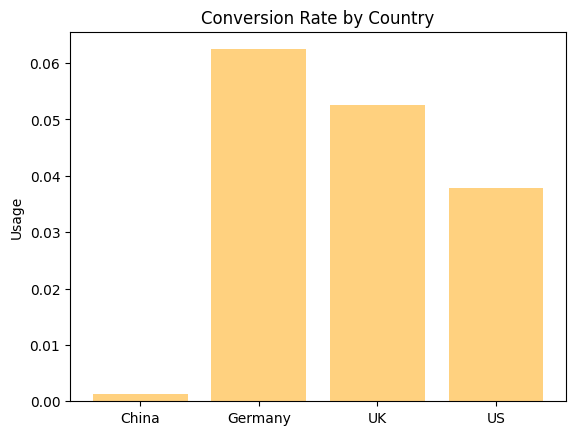

In [14]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('China', 'Germany','UK','US')
summary_ctry_conv = df.groupby('country', as_index=False)['converted'].mean()
y_value =  summary_ctry_conv['converted'].values.tolist()
x_value = np.arange(len(objects))


plt.bar(x_value, y_value, align='center', color = 'orange',alpha=0.5)
plt.xticks(x_value, objects)
plt.ylabel('Usage')
plt.title('Conversion Rate by Country')
 
plt.show()

#Here it clearly looks like Chinese convert at a much lower rate than other countries!

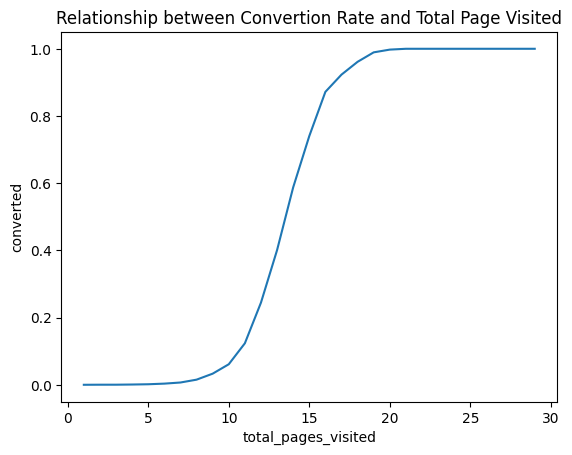

In [15]:
convert_by_total_visit = df.groupby('total_pages_visited', as_index=False)['converted'].mean()


x = convert_by_total_visit['total_pages_visited'].values.tolist()
y = convert_by_total_visit['converted'].values.tolist()

# plotting the points 
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('total_pages_visited')
# naming the y axis
plt.ylabel('converted')
 
# giving a title to my graph
plt.title('Relationship between Convertion Rate and Total Page Visited')
 
# function to show the plot
plt.show()

#Definitely spending more time on the site implies higher probability of conversion!

### Modeling

In [16]:
#Firstly, “Converted” should really be a factor here as well as new_user. So let’s change them:
df['new_user'] = df['new_user'].astype(object)
#df['converted']= df['converted'].astype(object)

<ipython-input-16-46629c4dad77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_user'] = df['new_user'].astype(object)


In [17]:
from sklearn.model_selection import train_test_split

new_df = pd.get_dummies(df)

X = new_df.loc[:, new_df.columns != 'converted']
y = new_df['converted'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=0)
print (X.shape, y.shape,X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(316198, 11) (316198,) (208690, 11) (107508, 11) (208690,) (107508,)


In [18]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = new_df.columns[:11]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
#show important features:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[f], importances[indices[f]]))

 1) age                            0.801620
 2) total_pages_visited            0.121369
 3) converted                      0.022670
 4) country_China                  0.018094
 5) country_Germany                0.016890
 6) country_UK                     0.004522
 7) country_US                     0.004251
 8) new_user_0                     0.002767
 9) new_user_1                     0.002767
10) source_Ads                     0.002626
11) source_Direct                  0.002424


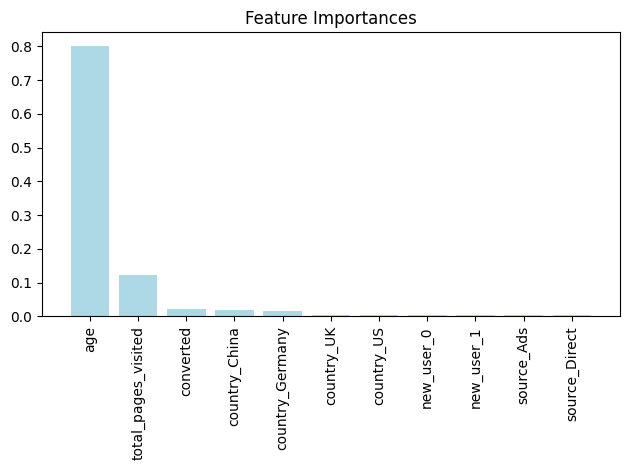

In [20]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
importances[indices],
color='lightblue',
align='center')
plt.xticks(range(X_train.shape[1]),
feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [21]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [22]:
from  sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE train: 0.011, test: 0.016
R^2 train: 0.638, test: 0.498


In [23]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(confmat)

[[103514    563]
 [  1106   2325]]


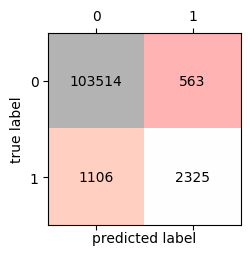

In [24]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.flag, alpha=0.3)  #flag is one color, Blues, Oranges also work
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
        s=confmat[i, j],
        va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()
#https://matplotlib.org/examples/color/colormaps_reference.html

In [25]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_test_pred))

print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_test_pred))

print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_test_pred))


Precision: 0.805
Recall: 0.678
F1: 0.736


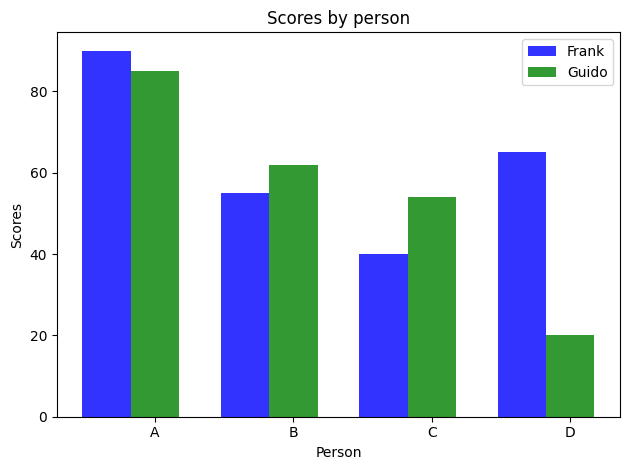

In [26]:
#test other plotting code:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 4
means_frank = (90, 55, 40, 65)
means_guido = (85, 62, 54, 20)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, means_frank, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Frank')
 
rects2 = plt.bar(index + bar_width, means_guido, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Guido')
 
plt.xlabel('Person')
plt.ylabel('Scores')
plt.title('Scores by person')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D'))
plt.legend()
 
plt.tight_layout()
plt.show()


In [ ]:
In [6]: df = pd.DataFrame({'value': np.random.randint(0, 100, 20)})

In [7]: labels = [ "{0} - {1}".format(i, i + 9) for i in range(0, 100, 10) ]

In [8]: df['group'] = pd.cut(df.value, range(0, 105, 10), right=False, labels=labels)

In [9]: df.head(10)
Out[9]: 
   value    group
0     65  60 - 69
1     49  40 - 49
2     56  50 - 59
3     43  40 - 49
4     43  40 - 49
5     91  90 - 99
6     32  30 - 39
7     87  80 - 89
8     36  30 - 39
9      8    0 - 9